# Gradient Descent

[Gradient Descent](https://en.wikipedia.org/wiki/Gradient_descent) is an optimization algorithm used to minimize (i.e., to find the minimum of) a given function. This algorithm is widely used in training machine learning models because it’s computationally efficient, especially for large datasets.

## A Very Simple Implementation

Let us implement a vanilla version of Gradient Descent to minimize a univariate function. Concretely, let us find the minimum of the following function.
$$
f(x) = (x+5)^2
$$

The derivative of this function (a scalar function in this case) is easily computed. Let us call this derivative $f^\prime$. Then, by using simple derivation rules from Calculus, we come up with $f^\prime$:

$$
f^\prime(x) = 2(x+5)
$$

The following are the steps of Gradient Descent applied to this case:

1. Take any point $x_0 \in \Re$. We will calculate the derivative of $f$ at this point.

2. For each $i = 1, \ldots$, set: $x_{i + 1} = x_i - \alpha f^\prime(x_i)$, where $\alpha$ is some (small and positive) number called *learning rate*.

3. We will continue calculating the next point $x_i$ until we are close enough to the minimum—for example, until the gradient is very small.


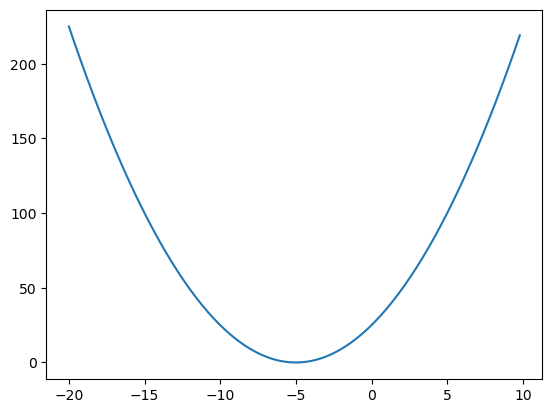

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# evenly sampled points
t = np.arange(-20., +10., 0.2)

f = lambda x: (x+5) * (x+5)

plt.plot(t, f(t))
plt.show()

By visually inspecting the graph presented above, we can see that the minimum of our function $f$ is at -5. But let us perfom Gradient Descent algorithm to find this value.
Let us first define all the needed variables for the algotithm implementation.

In [2]:
# Learning rate
rate = 0.01

df = lambda x: 2*(x+5) # Derivative of the function we want to optimize.

Now we can implement a simple vresion of Gradient Descent. See below.

In [ ]:
def gradient_descent(initial_value: float, learning_rate: float):
    """
    Performs gradient descent optimization to find the minimum of a function.

    Args:
        initial_value (float): The starting value of the variable to be optimized.
        learning_rate (float): The step size used in each iteration to update the variable.

    Returns:
        tuple: A tuple containing:
            - cur_theta (float): The optimized value of the variable after the algorithm has converged.
            - f_values_dict (dict): A dictionary where the keys are the iteration numbers and the values are the corresponding 
              values of the fucntion being minimized at each iteration.

    The function iteratively updates the variable by moving in the direction of the negative gradient of the function
    until the change in the variable is smaller than the specified precision or the maximum number of iterations is reached.
    """

    # This tells us when to stop the algorithm
    precision = 0.000001

    previous_step_size = 1 #

    cur_theta = initial_value
     
    # maximum number of iterations
    max_iters = 10000

    iters = 0 #iteration counter

    f_values_dict = dict()

    # This loop continues as long as the change in theta (previous_step_size) is larger than 
    # precision and the number of iterations is less than max_iters.
    while previous_step_size > precision and iters < max_iters:
        prev_theta = cur_theta #Store current x value in prev_theta
        cur_theta = cur_theta - learning_rate * df(prev_theta) #Grad descent
        previous_step_size = abs(cur_theta - prev_theta) #Change in theta
        iters = iters + 1 #iteration count
        f_values_dict[iters] = f(cur_theta)
    
    return cur_theta, f_values_dict

In the code above:
- `initial_value`: This is the starting point for the parameter (often called theta) that we are optimizing.
- `learning_rate`: This controls how large a step the algorithm takes in the direction of the gradient. A small learning rate makes the algorithm take smaller steps, while a large one makes it take larger steps.

Lets us now call our simple implementation of Gradient Descent:

In [4]:
cur_theta, f_values_dict = gradient_descent(initial_value=3, learning_rate=rate)
print(f"Starting at {3:.4f}...\t Local minimum occurs at {cur_theta:.4f}")

Starting at 3.0000...	 Local minimum occurs at -5.0000


Notice that, for all practical purposes, the value prduced by Gradient Descent is equal to the one we obtained by visually inspecting the function.

For debugging purposes, we can plot the successive values of the function being minimized along the iterations of Gradient Descent. See the piece of code below.

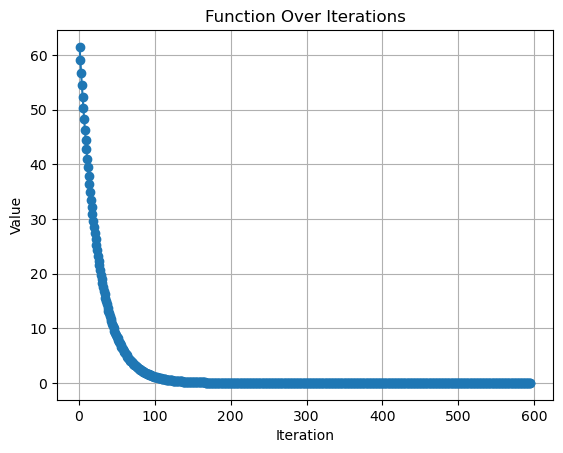

In [5]:
import matplotlib.pyplot as plt

# Extract keys (iterations) and values (loss) from the dictionary
iterations = list(f_values_dict.keys())
loss_values = list(f_values_dict.values())

# Create a line plot
plt.plot(iterations, loss_values, marker='o', linestyle='-')
plt.title('Function Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.grid(True)

# Show the plot (or save it to a file using plt.savefig())
plt.show()

As a sanity check, let us run our implementation using different starting points.

In [6]:
from numpy.random import randn
values = randn(10) # generate some Gaussian values
for initial_value in values:
    cur_theta, _ = gradient_descent(initial_value, learning_rate=rate)
    print(f"Starting at {initial_value:.4f}...\t Local minimum occurs at {cur_theta:.4f}")

Starting at 0.4743...	 Local minimum occurs at -5.0000
Starting at 1.5000...	 Local minimum occurs at -5.0000
Starting at -1.3582...	 Local minimum occurs at -5.0000
Starting at -0.1107...	 Local minimum occurs at -5.0000
Starting at -0.4413...	 Local minimum occurs at -5.0000
Starting at 0.2688...	 Local minimum occurs at -5.0000
Starting at 0.2444...	 Local minimum occurs at -5.0000
Starting at 0.5014...	 Local minimum occurs at -5.0000
Starting at 0.2339...	 Local minimum occurs at -5.0000
Starting at -1.5162...	 Local minimum occurs at -5.0000


By inspecting the above output, you should conclude that, in this simple case, Gradient Descent always converges to a value of $\theta$ that corresponds to the minimum of the function.

## Another Simple Example

As another example, now consider a function of two variables 

$$
f(x, y) = x^2 + 10y^2
$$

The gradient of $f$ is the following vector.

$$
\nabla f(x, y) = \frac{\partial f(x, y)}{\partial (x, y)} = (2x, 20y)
$$.

The gradient vector points in the direction of the fastest increase of the function, that is, it answers the question "where do we go if we are at the point $(x, y)$ and want to increase the value of the function as quickly as possible?" To decrease the value of the function, you need to go in the opposite direction. 

The following are the steps of Gardient Descent applied to this case:

1. Take any point $(x_0, y_0)$. We will calculate the gradient at this point.

2. For each $i = 1, \ldots$, set: $(x_{i + 1}, y_{i + 1}) = (x_i, y_i) - \alpha \nabla f(x_i, y_i)$, where $\alpha$ is some (small) number.

3. We will continue calculating the next point $(x_i, y_i)$ until we are close enough to the minimum—for example, until the gradient is very small.

The code below implements the steps above:

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import norm
%matplotlib inline

def f(u):
    ''' 
    Computes the value of the function f(x, y) = x^2 + 10y^2 at the point (x, y).

    Args:
        u (np.array): A numpy array where u[0] is the x-coordinate and u[1] is the y-coordinate.

    Returns:
        float: The computed value of the function at the given point (x, y).
    '''
    return u[0] ** 2 + 10 * u[1] ** 2

def Df(u):
    '''
    Computes the gradient of the function f(x, y) = x^2 + 10y^2 at the point (x, y).

    Args:
        u (np.array): A numpy array where u[0] is the x-coordinate and u[1] is the y-coordinate.

    Returns:
        np.array: A numpy array representing the gradient vector [Df_x, Df_y], 
                  where Df_x is the partial derivative with respect to x and Df_y is the partial derivative with respect to y.
    '''
    return np.array([2*u[0], 20 * u[1]])

In [8]:
def gradient_descent_simple(f, Df, alpha=0.01, steps=20000, initial_point=(-3, 3), 
                            precision=1e-10, xmin=-4, xmax=4, ymin=-3, 
                            ymax=3, allpoints=False):
    
    
    u_prev = np.array(initial_point)

    X = np.linspace(xmin, xmax, 100)
    Y = np.linspace(ymin, ymax, 100)
    plt.figure(figsize=(6, 6))
    plt.contour(X, Y, [[f(np.array([x, y])) for x in X] for y in Y], 100)

    points = []
    for i in range(steps):
        points.append(u_prev)
        u_new = u_prev - alpha * Df(u_prev)

        if norm(u_new - u_prev) < precision:
            break

        u_prev = u_new


    plt.plot([p[0] for p in points], [p[1] for p in points], 'o-')
    if allpoints:
        return points
    return points[-1]

An appropriate value of $\alpha$ results in a smooth convergence.

array([-4.94792403e-09,  2.95255661e-97])

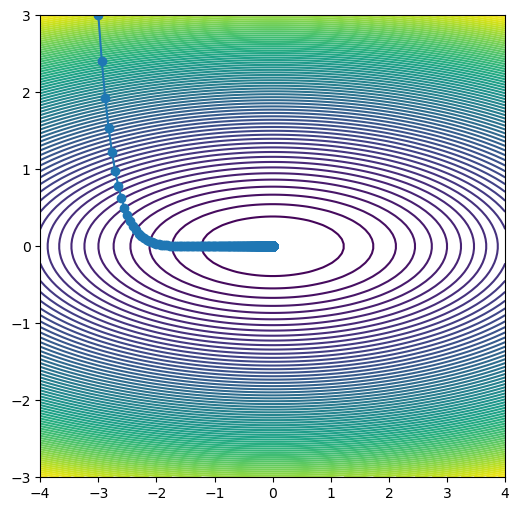

In [9]:
gradient_descent_simple(f=f, Df=Df)

If we take $\alpha$ too large, there may be no convergence:

array([-1.e-323, -3.e+000])

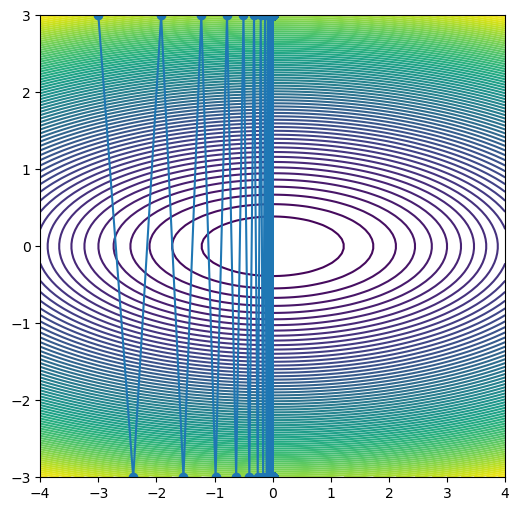

In [10]:
gradient_descent_simple(f=f, Df=Df, alpha=0.1)

And if $\alpha$ is too small, we may not reach the minimum:

array([-2.99988001,  2.9988003 ])

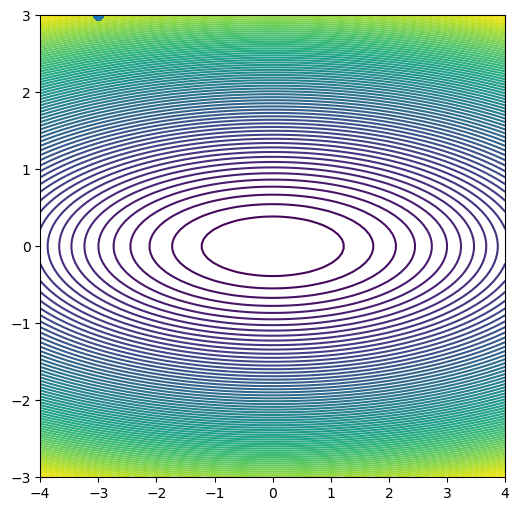

In [11]:
gradient_descent_simple(f=f, Df=Df, alpha=1e-9)

## Optimization libraries

By now, you should understand that Gradient Descent solves an optimization problem. An optimization problem is one in which, given a function, we want to find the point that corresponds to the optimal value (minimum or maximum) of the function.

The implementation of Gradient Descent we saw before has strictly didatical purposes, and should not be used in practice. In real applications, we can use several software libraries available to solve optimization problems. As an illustration, the following code computes the minimum value of the function $f(x) = x^3 - 3x^2 + 7$ within the range $[3,500]$. This piece of code uses the well-known [scipy](https://pypi.org/project/scipy/) library.

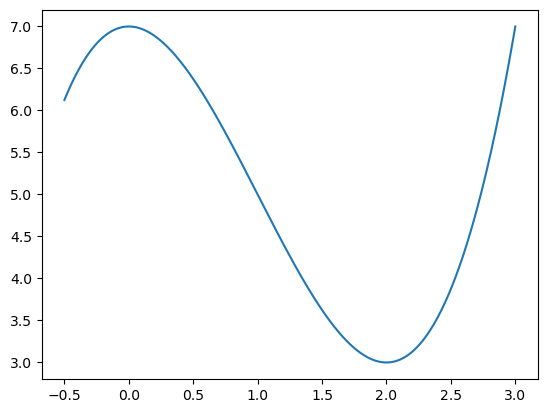

In [12]:
import numpy as np
import matplotlib.pyplot as plt

f1 = lambda x: (x ** 3)-(3 *(x ** 2))+7

# Get 1000 evenly spaced num bers between -1 and 3 (arbitratil chosen to ensure steep curve)
x = np.linspace(-0.5,3,500)

# Plot the curve
plt.plot(x, f1(x))
plt.show()

In [13]:
from scipy import optimize

result = optimize.minimize_scalar(f1)
print(result.success) # check if solver was successful

print('Minimum of function occurs at x = %.2f' % result.x)

True
Minimum of function occurs at x = 2.00


The concept of optimization is also applicable to functions of more than one variable.

In the following example, a function of two variables (a paraboloid in this case) is used to illustrate the optimization procedure.

Text(0.5, 0, 'y')

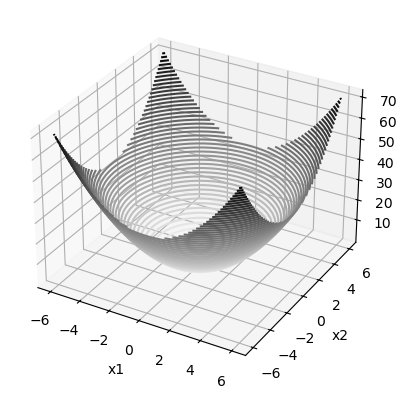

In [14]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np

def f_paraboloide(x1, x2):
    return x1 ** 2 + x2 ** 2

x1 = np.linspace(-6, 6, 30)
x2 = np.linspace(-6, 6, 30)

X1, X2 = np.meshgrid(x1, x2)
Y = f_paraboloide(X1, X2)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X1, X2, Y, 50, cmap='binary')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

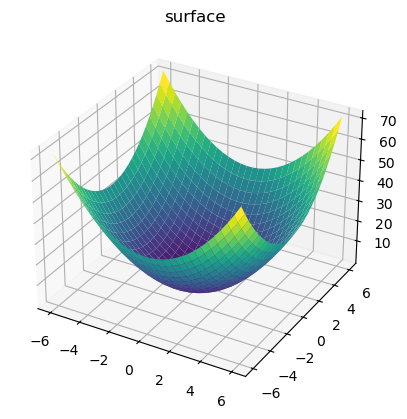

In [15]:
ax = plt.axes(projection='3d')
ax.plot_surface(X1, X2, Y, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

In [16]:
from scipy import optimize

def f2(x):
    return (x[0]**2 + x[1]**2)

optimize.minimize(f2, [2, -1], method="CG")

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 5.8281095370852615e-15
       x: [-6.828e-08  3.414e-08]
     nit: 1
     jac: [-1.217e-07  8.318e-08]
    nfev: 9
    njev: 3

In fact, much more complicate functions can be optimized. See the example below.

Text(0.5, 0, 'y')

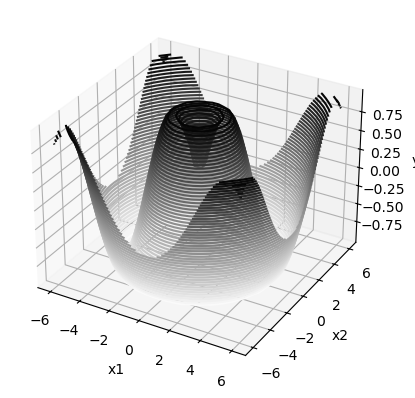

In [17]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np

def f(x1, x2):
    return np.sin(np.sqrt(x1 ** 2 + x2 ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X1, X2 = np.meshgrid(x, y)
Y = f(X1, X2)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X1, X2, Y, 50, cmap='binary')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

In [18]:
from scipy import optimize

def f2(x):
    return (x[0]**2 + x[1]**2)

optimize.minimize(f2, [2, -1], method="CG")

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 5.8281095370852615e-15
       x: [-6.828e-08  3.414e-08]
     nit: 1
     jac: [-1.217e-07  8.318e-08]
    nfev: 9
    njev: 3

## Gradient Descent and its variants

There are numerous gradient-based optimization methods. The study of these methods is outside the scope of this course. In any case, the following animation ([source]((https://www.datasciencecentral.com/profiles/blogs/an-overview-of-gradient-descent-optimization-algorithms))) illustrates the behavior of some of these methods while minimizing a given function. Notice how some of these methods manage to scape the local minima, while some others remain stuck in it.

![alt text](http://storage.ning.com/topology/rest/1.0/file/get/2808327843?profile=original)

## The Learning Rate


In the update rule used by Gradient Descent  presented above, $\alpha$ is a numerical value called *learning rate*. This constant controls the amount of update on the components of $\Theta$.

The learning rate is a hyperparameter of both linear regression and logistic regression learning algorithm. You will also find this hyperparameters in artificial neural networks. The following animation (source: [Machine Learning Refined](https://github.com/jermwatt/machine_learning_refined)) illustrates the effect of different learning rate values ​​on the optimization process. 
- When $\alpha$ is defined as too large and the evaluation sequence starts to get out of control, the sequence of steps is said to diverge. 
- On the other hand, if the value of $\alpha$ is very small, the convergence of the process can take significantly.

![alt text](https://github.com/jermwatt/machine_learning_refined/blob/gh-pages/html/gifs/steplength_1D.gif?raw=true)

